# A simple notebook which analyses the Songs we have been listening on Alexa since January 2019 to October 2019

#Load the csv 

In [138]:
import matplotlib.pyplot as plt
import csv
import pandas as pd 
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import calendar
from pandas.plotting import register_matplotlib_converters
import glob
from datetime import date
from datetime import timedelta


register_matplotlib_converters()

path = r'/home/pi/songs_analysis' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None,parse_dates=[0],usecols=[0,1,2,3],names=['date','artist','title','album'],skip_blank_lines=True,)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data.head()



#data = pd.read_csv("consolidated.csv",nrows=5285,parse_dates=[0],usecols=[0,1,2,3],names=['date','artist','title','album'],skip_blank_lines=True,)
#data = pd.read_csv("face_data-jul18.csv",parse_dates=[1],index_col=[1])
#data.dropna(how="all", inplace=True) 
# Add day of the week 
data["day_of_the_week"] = data["date"].dt.day_name()
data["month_of_the_year"] = data["date"].dt.month_name()
data["week_of_the_year"] = data["date"].dt.week





# Filter on dates if needed
new_date=pd.datetime.now()
#new_date=pd.to_datetime('01-August-2019')
older_date = new_date - timedelta(4)
mask = (data['date'] > older_date) & (data['date'] <= new_date)
#data=data.loc[mask]


# Removing the songs which are played daily.
data = data[data.title != "4AM Hanuman Chalisa"]
data = data[data.title != "Gayatri Mantra"]


# Preview the first 5 lines of the loaded data 
data.head()

,date,artist,title,album,day_of_the_week,month_of_the_year,week_of_the_year
0,2019-01-10 18:57:00,"Neha Kakkar, Mika Singh & Kumar Sanu","Aankh Marey (From ""Simmba"")","Aankh Marey (From ""Simmba"")",Thursday,January,2
2,2019-01-11 21:00:00,"Anand, millind & Majrooh Sultanpuri",Papa Kehte Hain,Indian Idol 2 - Woh Pehli Baar,Friday,January,2
3,2019-01-11 21:01:00,"Neha Kakkar, Mika Singh & Kumar Sanu","Aankh Marey (From ""Simmba"")","Aankh Marey (From ""Simmba"")",Friday,January,2
4,2019-01-11 21:05:00,"Udit Narayan, Rajesh Roshan & Javed Akhtar",Ghar Se Nikalte,Papa Kehte Hain,Friday,January,2
5,2019-01-11 21:06:00,"Udit Narayan, Anand-Milind & Majrooh Sultanpuri",Papa Kahte Hain,Qayamat Se Qayamat Tak,Friday,January,2


In [139]:
# Total no of Songs Played till date
print ("Total No of Songs Played: "+str(data['title'].count()))

# Total no of Unique songe
print ("Total No of Unique Songs Played: "+str(data['title'].nunique()))
print ("Total No of Unique Albums Played: "+str(data['album'].nunique()))
print ("Total No of Unique Artists Played: "+str(data['artist'].nunique()))

Total No of Songs Played: 4888
Total No of Unique Songs Played: 1011
Total No of Unique Albums Played: 671
Total No of Unique Artists Played: 749


In [140]:
# Build the word Cloud for the Artists

#from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt
#text = data.artist.tolist()
#wordcloud = WordCloud(
#    width = 3000,
#    height = 2000,
#    background_color = 'black',
#    stopwords = STOPWORDS).generate(str(text))
#fig = plt.figure(
#    figsize = (40, 30),
#    facecolor = 'k',
#    edgecolor = 'k')
#plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

In [141]:
# Build the word Cloud for the Title

#from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt
#text = data.title.tolist()
#wordcloud = WordCloud(
#    width = 3000,
#    height = 2000,
#    background_color = 'black',
#    stopwords = STOPWORDS).generate(str(text))
#fig = plt.figure(
#    figsize = (40, 30),
#    facecolor = 'k',
#    edgecolor = 'k')
#plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

In [142]:
# Build the word Cloud for the Album

#from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt
#text = data.album.tolist()
#wordcloud = WordCloud(
#    width = 3000,
#    height = 2000,
#    background_color = 'black',
#    stopwords = STOPWORDS).generate(str(text))
#fig = plt.figure(
#    figsize = (40, 30),
#    facecolor = 'k',
#    edgecolor = 'k')
#plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

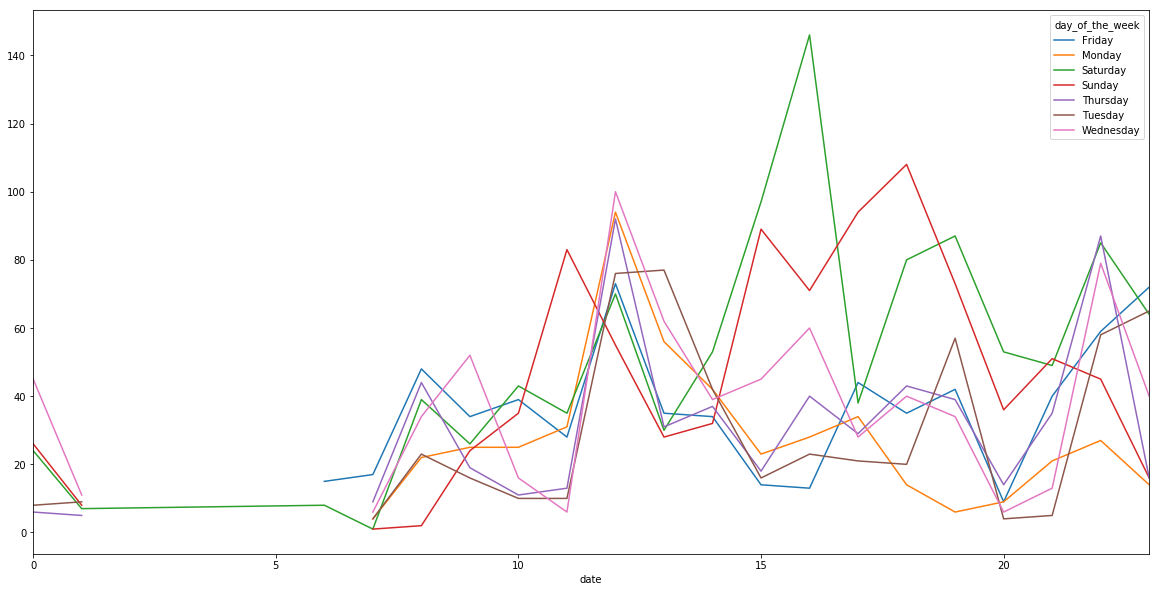

In [143]:
# Number of songs played in day per week
#print (data.groupby([data['date'].dt.hour, 'day_of_the_week'])['title'].count().unstack())

data.groupby([data['date'].dt.hour, 'day_of_the_week'])['title'].count().unstack().plot(figsize=(20,10))


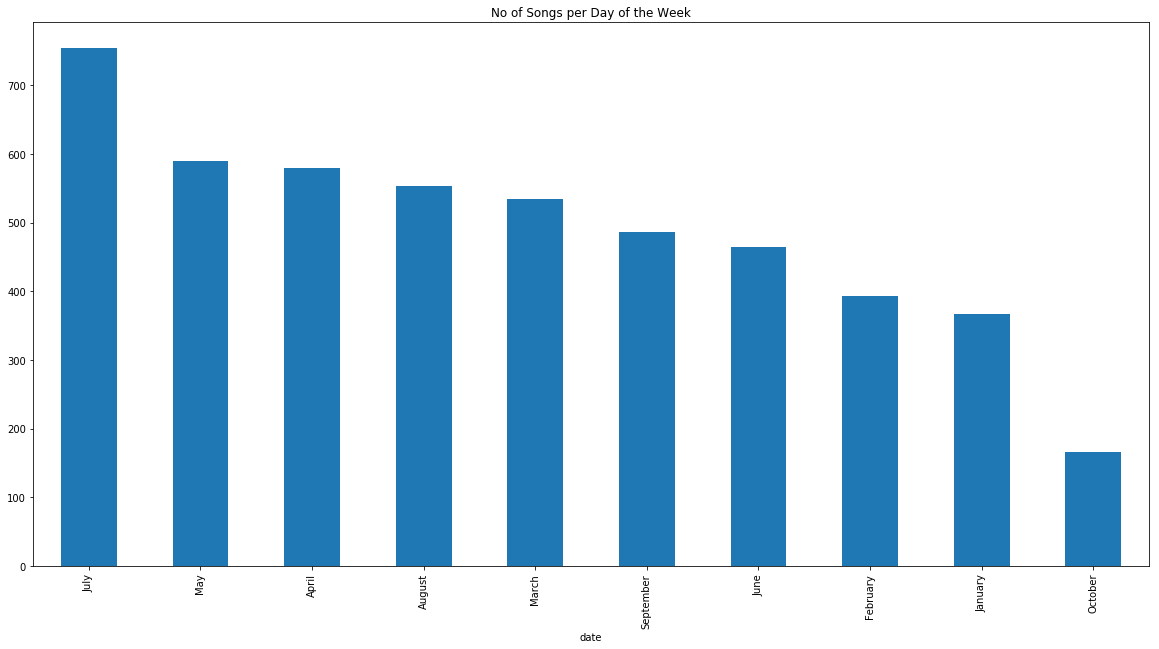

In [144]:
data.groupby(data["date"].dt.month_name())['title'].count().sort_values(ascending=False).plot(kind="bar",title="No of Songs per Day of the Week",figsize=(20,10))


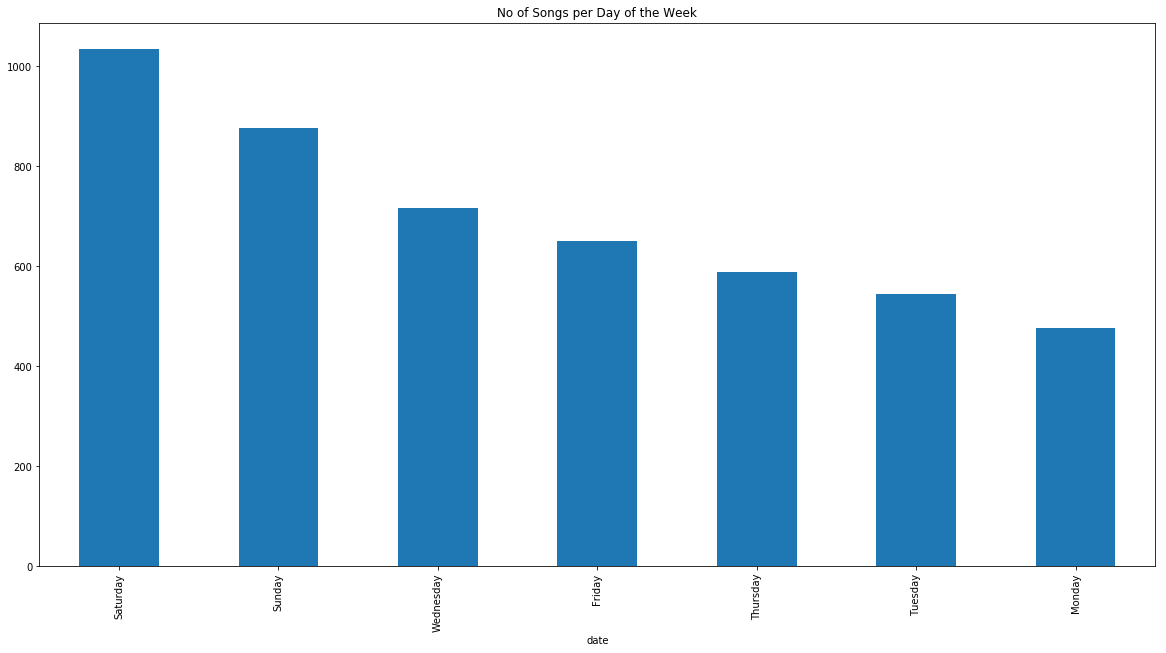

In [145]:
data.groupby(data["date"].dt.day_name())['title'].count().sort_values(ascending=False).plot(kind="bar",title="No of Songs per Day of the Week",figsize=(20,10))



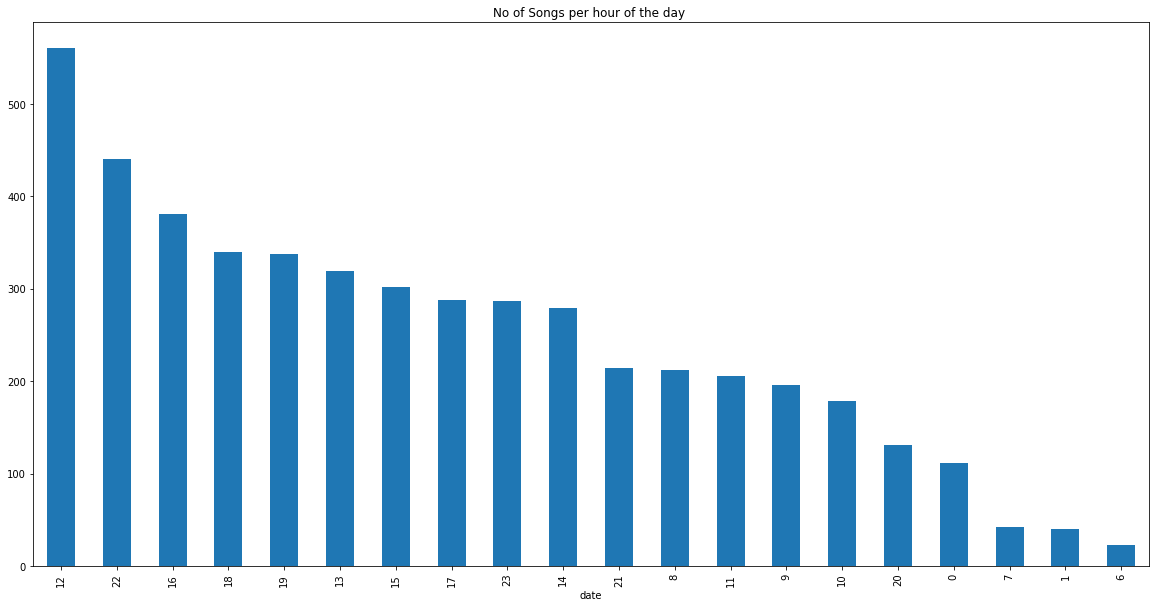

In [146]:
data.groupby(data["date"].dt.hour)['title'].count().sort_values(ascending=False).plot(kind="bar",title="No of Songs per hour of the day ",figsize=(20,10))


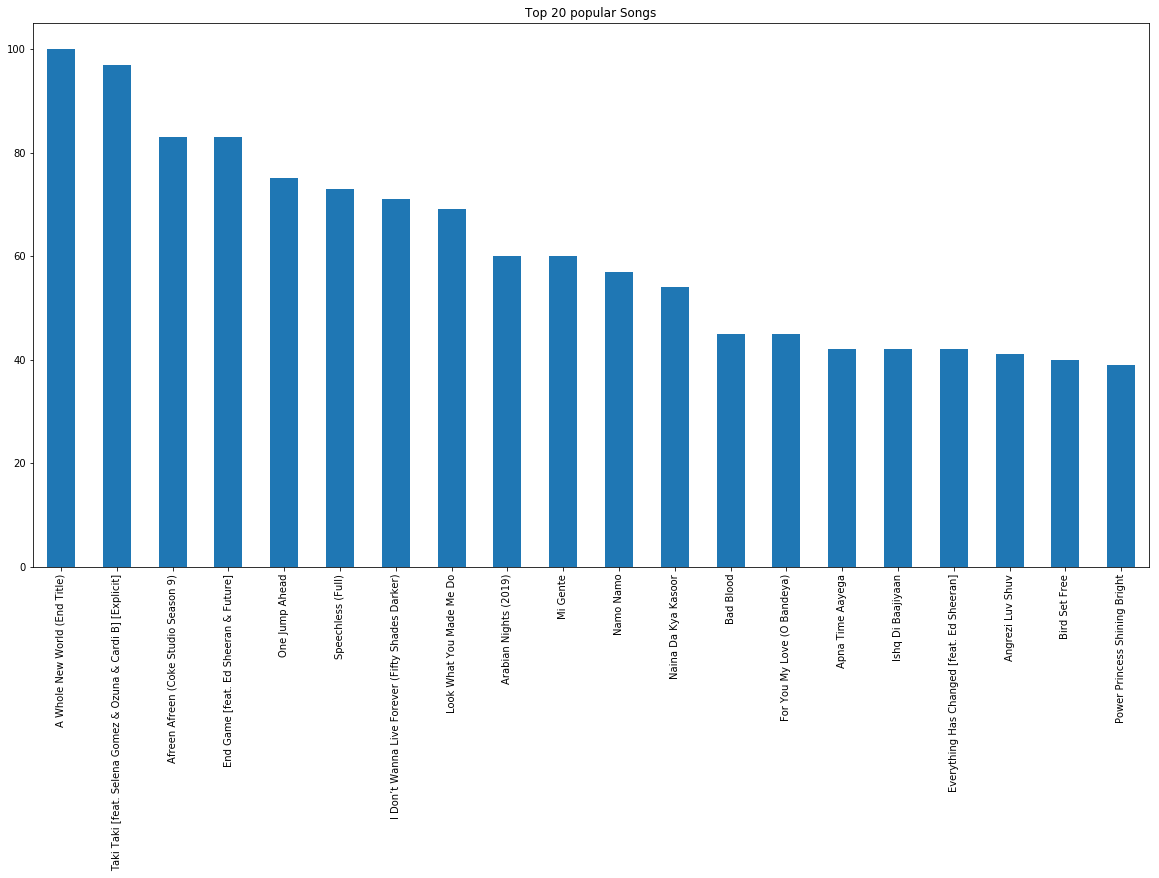

In [147]:
# Print Top 20 Titles songs
#pd.Series(data['title']).value_counts().plot('bar')
data['title'].value_counts()[:20].plot(kind="bar",title="Top 20 popular Songs",figsize=(20,10))



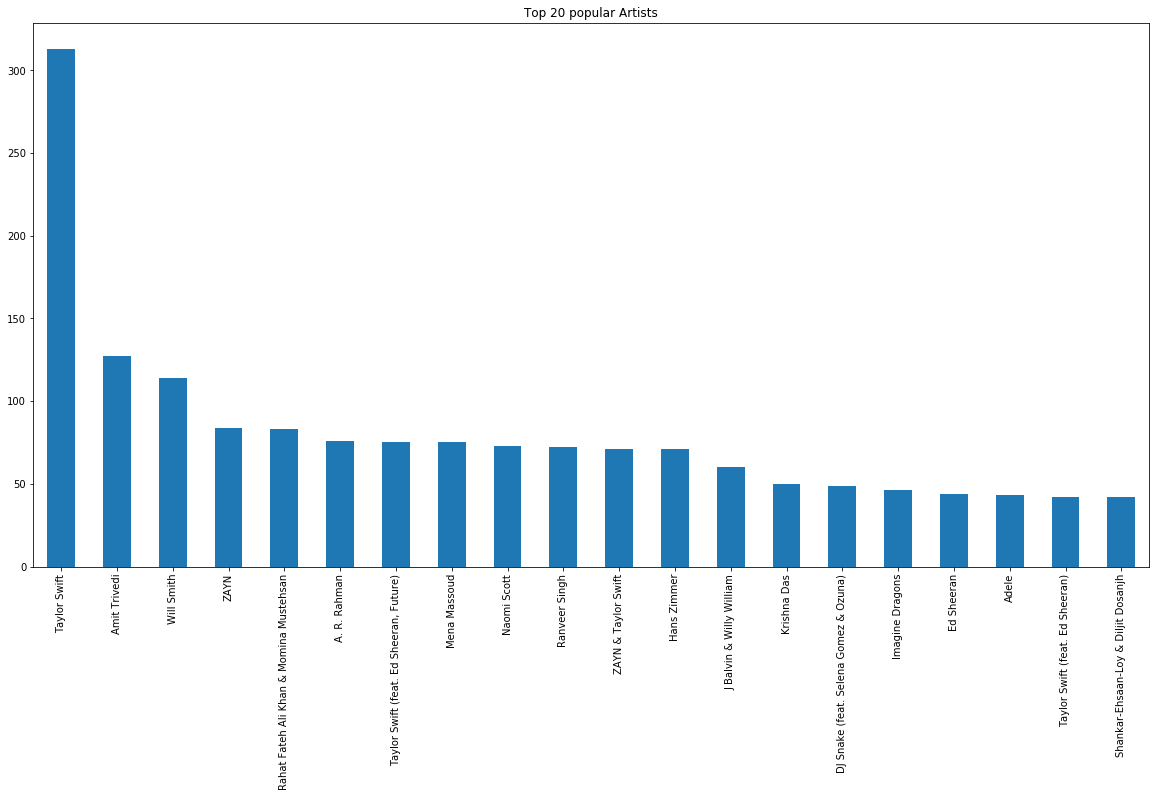

In [148]:
data['artist'].value_counts()[:20].plot(kind="bar",title="Top 20 popular Artists",figsize=(20,10))




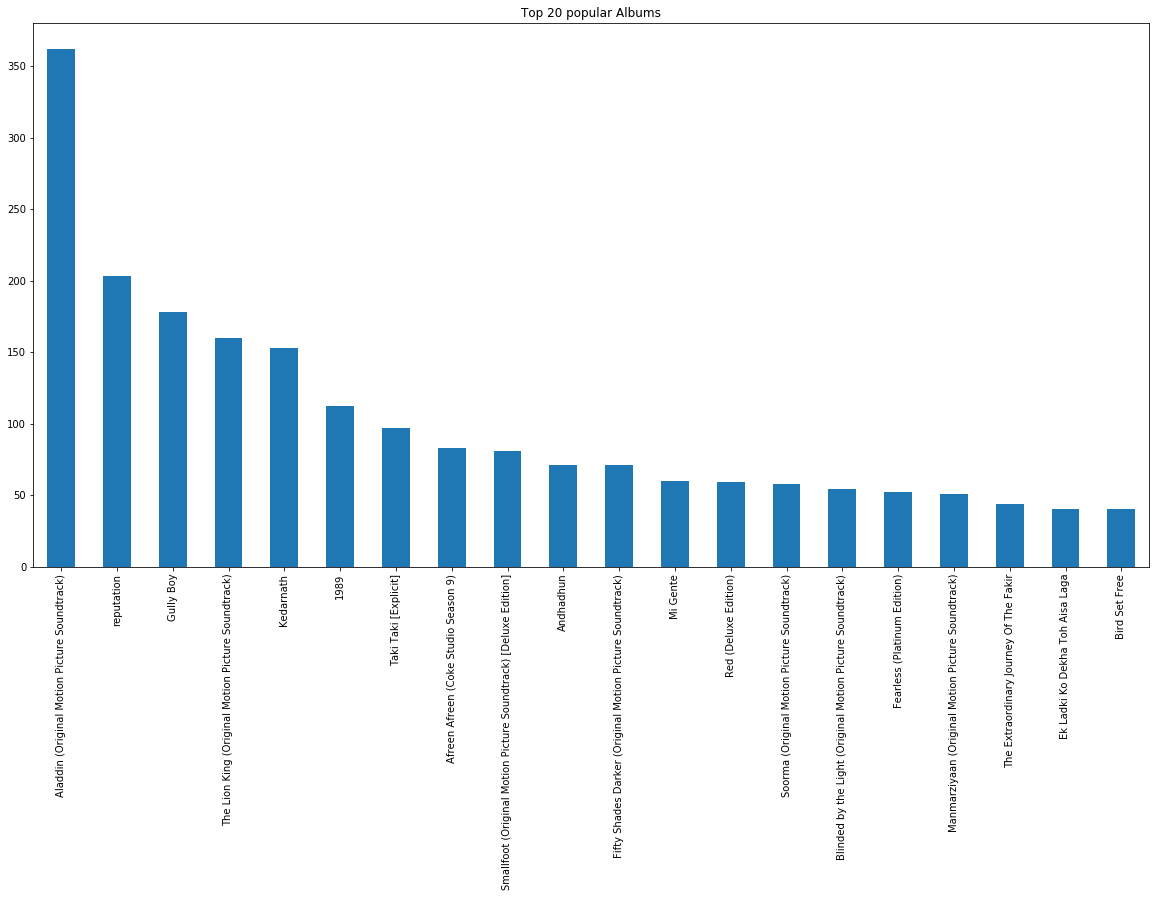

In [149]:
data['album'].value_counts()[:20].plot(kind="bar",title="Top 20 popular Albums",figsize=(20,10))


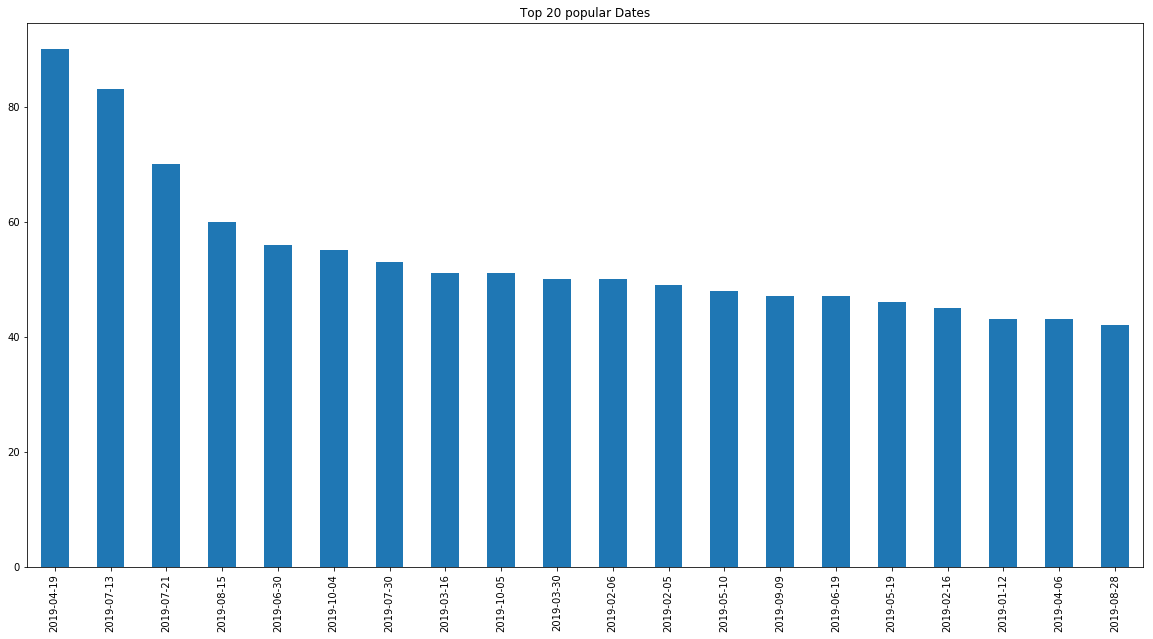

In [150]:
data['date'].dt.date.value_counts()[:20].plot(kind="bar",title="Top 20 popular Dates",figsize=(20,10))



In [151]:
#grouped = data.groupby(['month_of_the_year','title'])['title'].sum()
#grouped['month_of_the_year'].dt.date.value_counts()[:20].plot(kind="bar",title="Top 20 popular Dates",figsize=(20,10))


